In [6]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np

fname = "../reads.fq"
with open(fname, "r") as f:
    for record in SeqIO.parse(f, "fastq"):
        print("seq. id:", record.id)
        print("seq.:", record.seq)
        print("q-scores:", record.letter_annotations["phred_quality"]) # quality score
        print()
        break

seq. id: a6b08eb2-38bc-4ee8-bd44-f9ef896b4f76
seq.: ATCAAGTGCACAAAAAGATGATGCTGAACTTTGCAATGGGTATCTACATGGACGGGTATAAGGGAGGTGATCCGGTCCTCAAGCTTCGCTGCCCGACACTGTGGGAAAGAGTGGTTGACAGTAAGGACGGCACTGCCCTGCTCGAACTCCACACCGCAGGTCGCGATTTGGCGGTATGTAGACGGATACCCTCTGTGGGCATGTGGGCCTGGGGAATTTGTTGACAGACCTAGCGCGGTAGTGGACTTGCTATTACAGTTTGAATAAAAGGTGAGTTATAAGGTATTCATGCACCTACCAACAACAATACAACGGAGAAAGTGGAATGACGAAAGAAGAGGCCGACGTATTAGATTTTGCACTAGAGGCTACGCAGGAGGCTTTGGTGTTAGCTTGGAAAATGAACCAGCGTGCTGCAGAATGCAACCGCCGCATCAATGAGATTCTGGGCATGTCTATGTATGATTTTACCATGCATGCCGGAGAGATTCCTGAATTAACTGCAGAGATGAATGATCTTGACAATAAAATTAATATCATTCTGAAGACAGCAGAAACAACTCACCAAACCGCCCGTAAATTTATCAACGAGAAGGTGTGAATATGGACTACAGCTACTGCGGGGAAGAAGTTCCTTTTAACTACAGCGATCTTACCACGAGCAATCCATATCGAGAACTCGCCACGGCACGCACATCATCGCCATTGACTTTGATGGAACGTTTAATGCGAGCCCTTTCATCTTCTCCCGCCTGATCAGGAATATAAAGAGGGGTGGACAGTCTACCTTGTGACTTTCCGATTCATTACTCAAGACAATGTAGACATCGAGTATTGGCGCAAGGAGCTCAATGTTGGTGTGTTTTATACTGGTGGTGTTCAGAAGGCAGCCTACCTGGCGCAGTTTGATATCTACCCGGGATCTA
q-scores: [9, 10, 12,

In [7]:
L = [] # list of length for each read
Q = [] # quality scores for each basepair
with open(fname, "r") as f:
    for record in SeqIO.parse(f, "fastq"):
        L.append(len(record.seq))
        Q += record.letter_annotations["phred_quality"]

print(f"Number of reads: {len(L)}")
print(f"Number of basepairs: {len(Q)//1e6} Mbp")
print(f"Average read length: {sum(L)/len(L)}")


Number of reads: 7572
Number of basepairs: 28.0 Mbp
Average read length: 3756.1316693079766


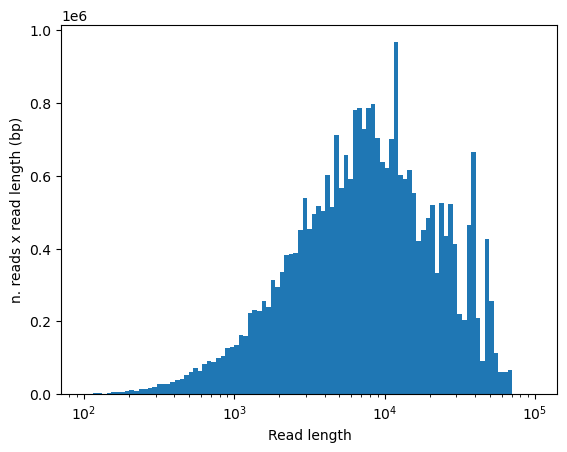

In [8]:
plt.hist(L, bins=np.logspace(2,5,100), weights=L)
plt.xscale("log")
plt.xlabel("Read length")
plt.ylabel("n. reads x read length (bp)")
plt.show()

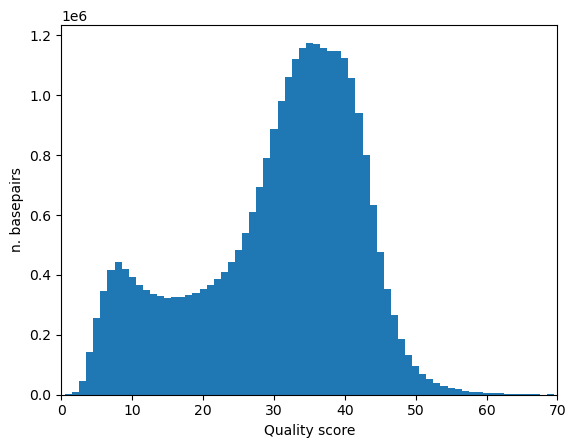

In [9]:
from collections import Counter
Nq = Counter(Q)
plt.bar(Nq.keys(), Nq.values(), width=1)
plt.xlim(0, 70)
plt.xlabel("Quality score")
plt.ylabel("n. basepairs")
plt.show()